In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
takehome_users = pd.read_csv('takehome_users.csv', encoding='latin-1')
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


# Data Cleaning

In [3]:
takehome_users.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

There appears to be nan values in two of the features. I will create columns for each that marks them as none and then fill in the missing values with the mean of the column.

In [4]:
def isna_col(df, col_name):
    if col_name == 'phone':
        isna = df['phone'].loc[df['phone'] == 2]
    else:
        isna = df.loc[df[col_name].isna()]
    na_ind = list(isna.index)
    new_col = [0 for _ in range(len(df))]
    for i in na_ind:
        new_col[i] = 1
    return new_col

In [5]:
creation_time = pd.DataFrame({'last_session_creation_time_isna':
                              isna_col(takehome_users, 'last_session_creation_time')})
invitation = pd.DataFrame({'invited_by_user_id_isna': isna_col(takehome_users, 'invited_by_user_id')})

In [6]:
takehome_users = takehome_users.fillna(takehome_users.mean())
takehome_users.isna().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [7]:
# These columns will be one-hot encoded and then dropped from the original dataset
categorical = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']

In [8]:
# Converts each category into a feature with one-hot encoding
drip = pd.get_dummies(takehome_users['enabled_for_marketing_drip'], 
                         prefix='enabled_for_marketing_drip')
mailing = pd.get_dummies(takehome_users['opted_in_to_mailing_list'],
                         prefix='opted_in_to_mailing_list')
creation = pd.get_dummies(takehome_users['creation_source'])
creation_time = pd.get_dummies(creation_time['last_session_creation_time_isna'],
                              prefix = 'last_session_creation_time_isna')
invitation = pd.get_dummies(invitation['invited_by_user_id_isna'],
                                prefix='invited_by_user_id_isna')

takehome_users = takehome_users.drop(categorical, axis=1).join([drip, mailing, creation, creation_time,
                                                               invitation])
takehome_users.head()

,object_id,creation_time,name,email,last_session_creation_time,org_id,invited_by_user_id,enabled_for_marketing_drip_0,enabled_for_marketing_drip_1,opted_in_to_mailing_list_0,opted_in_to_mailing_list_1,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,last_session_creation_time_isna_0,last_session_creation_time_isna_1,invited_by_user_id_isna_0,invited_by_user_id_isna_1
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,11,10803.0,1,0,0,1,1,0,0,0,0,1,0,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,1,316.0,1,0,1,0,0,1,0,0,0,1,0,1,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,94,1525.0,1,0,1,0,0,1,0,0,0,1,0,1,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,1,5151.0,1,0,1,0,1,0,0,0,0,1,0,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,193,5240.0,1,0,1,0,1,0,0,0,0,1,0,1,0


In [9]:
engagement = pd.read_csv('takehome_user_engagement.csv')
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
len(engagement.user_id.unique())

8823

In [11]:
# Set aside the unique values of the users
unique_ids = engagement['user_id'].unique()
unique_ids

array([    1,     2,     3, ..., 11998, 11999, 12000])

In [12]:
# Creating a copy of engagement to be able to obtain the adopted_users column
temp = engagement
temp = temp.groupby(['user_id', 'time_stamp']).mean().T

In [13]:
temp.head()

user_id                  1                   2                          \
time_stamp 2014-04-22 03:53:30 2013-11-15 03:45:04 2013-11-29 03:45:04   
visited                      1                   1                   1   

user_id                                                                 \
time_stamp 2013-12-09 03:45:04 2013-12-25 03:45:04 2013-12-31 03:45:04   
visited                      1                   1                   1   

user_id                                                                 \
time_stamp 2014-01-08 03:45:04 2014-02-03 03:45:04 2014-02-08 03:45:04   
visited                      1                   1                   1   

user_id                         ...               11991                      \
time_stamp 2014-02-09 03:45:04  ... 2014-04-28 14:22:45 2014-05-17 14:22:45   
visited                      1  ...                   1                   1   

user_id                                      11992               11995  \
time_stamp 2014-05-30 14:22:45 2014-04-11 19:39:56 2013-10-22 13:33:17   
visited                      1                   1                   1   

user_id                  11996               11997               11998  \
time_stamp 2013-09-06 06:14:15 2013-01-15 18:28:37 2014-04-27 12:45:16   
visited                      1                   1                   1   

user_id                  11999               12000  
time_stamp 2012-06-02 11:55:59 2014-01-26 08:57:12  
visited                      1                   1  

[1 rows x 207917 columns]

In [14]:
# Kees track of which entries were labeled as an adoptive user
next_login = []

In [15]:
for i in unique_ids:
    # Transpose to access the data
    temp_df = temp[i].T
    # Creates the login time into datetime
    tf_datetime = pd.to_datetime(temp_df.index)
    if len(temp_df) == 1:
        # When there is only 1 login period then automatically set it to 0
        next_login.append(0)
    else:
        
        temp_list = []
        for i in range(len(tf_datetime) - 1):
            temp_list.append((tf_datetime[len(tf_datetime) - i - 1] -
                               tf_datetime[len(tf_datetime) - i - 2]).days)
        temp_list.append(0)
        temp_list.reverse()
        for i in range(len(temp_list)):
            next_login.append(temp_list[i])

In [16]:
engagement['days_last_login'] = next_login
engagement

,time_stamp,user_id,visited,days_last_login
0,2014-04-22 03:53:30,1,1,0
1,2013-11-15 03:45:04,2,1,0
2,2013-11-29 03:45:04,2,1,14
3,2013-12-09 03:45:04,2,1,10
4,2013-12-25 03:45:04,2,1,16
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,0
207913,2013-01-15 18:28:37,11997,1,0
207914,2014-04-27 12:45:16,11998,1,0
207915,2012-06-02 11:55:59,11999,1,0


In [17]:
study = engagement.groupby(['user_id', 'time_stamp']).mean().T
study

user_id                       1                   2                          \
time_stamp      2014-04-22 03:53:30 2013-11-15 03:45:04 2013-11-29 03:45:04   
visited                           1                   1                   1   
days_last_login                   0                   0                  14   

user_id                                                                      \
time_stamp      2013-12-09 03:45:04 2013-12-25 03:45:04 2013-12-31 03:45:04   
visited                           1                   1                   1   
days_last_login                  10                  16                   6   

user_id                                                                      \
time_stamp      2014-01-08 03:45:04 2014-02-03 03:45:04 2014-02-08 03:45:04   
visited                           1                   1                   1   
days_last_login                   8                  26                   5   

user_id                              ...               11991  \
time_stamp      2014-02-09 03:45:04  ... 2014-04-28 14:22:45   
visited                           1  ...                   1   
days_last_login                   1  ...                   3   

user_id                                                               11992  \
time_stamp      2014-05-17 14:22:45 2014-05-30 14:22:45 2014-04-11 19:39:56   
visited                           1                   1                   1   
days_last_login                  19                  13                   0   

user_id                       11995               11996               11997  \
time_stamp      2013-10-22 13:33:17 2013-09-06 06:14:15 2013-01-15 18:28:37   
visited                           1                   1                   1   
days_last_login                   0                   0                   0   

user_id                       11998               11999               12000  
time_stamp      2014-04-27 12:45:16 2012-06-02 11:55:59 2014-01-26 08:57:12  
visited                           1                   1                   1  
days_last_login                   0                   0                   0  

[2 rows x 207917 columns]

In [18]:
sample = study[10].T.reset_index()
sample

,time_stamp,visited,days_last_login
0,2013-01-16 22:08:03,1,0
1,2013-01-22 22:08:03,1,6
2,2013-01-30 22:08:03,1,8
3,2013-02-04 22:08:03,1,5
4,2013-02-06 22:08:03,1,2
...,...,...,...
279,2014-05-30 22:08:03,1,1
280,2014-05-31 22:08:03,1,1
281,2014-06-01 22:08:03,1,1
282,2014-06-02 22:08:03,1,1


In [19]:
adopted_user = {}
for i_d in unique_ids:
    # Transposes the current dataframe into a 
    sample = study[i_d].T.reset_index()
    # These are trackers that will decide whether a user is an adopted user
    count = 0
    freq = 1
    # Initially sets all the ids to 0
    adopted_user[i_d] = 0
    # Loop through each user's login history
    for i in range(len(sample)):
        for j in range(i, len(sample)):
            # counts the login days for each login. This will break when: 
            # the amount of days is greater than 7 or when it finds 
            # at least three visits on three separate days within a 7 day period
            count += sample['days_last_login'][j]
            # if the count 
            if count <= 7:
                freq += 1
            if freq >= 3:
                count = 0
                freq = 0
                adopted_user[i_d] = 1
                break
            if count > 7:
                break
    count = 0
    freq = 0

In [20]:
len(adopted_user)

8823

In [21]:
adopted_user = pd.DataFrame(adopted_user, index=[0]).T
adopted_user.head()

,0
1,0
2,0
3,0
4,0
5,0


In [22]:
engagement['days_last_login'] = adopted_user[0]
engagement['days_last_login'] = engagement['days_last_login'].fillna(0)
engagement.head()

,time_stamp,user_id,visited,days_last_login
0,2014-04-22 03:53:30,1,1,0.0
1,2013-11-15 03:45:04,2,1,0.0
2,2013-11-29 03:45:04,2,1,0.0
3,2013-12-09 03:45:04,2,1,0.0
4,2013-12-25 03:45:04,2,1,0.0


In [23]:
engagement = engagement.groupby('user_id').mean()
adopted_users = {}
for index in engagement.index:
    if engagement['days_last_login'][index] != 0:
        adopted_users[index] = 1
    else:
        adopted_users[index] = 0

In [24]:
adopted_users

{1: 0,
 2: 1,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 1,
 10: 1,
 11: 0,
 13: 0,
 14: 0,
 17: 0,
 19: 0,
 20: 1,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 33: 1,
 36: 0,
 37: 1,
 41: 0,
 42: 1,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 1,
 49: 0,
 50: 1,
 51: 0,
 53: 1,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 63: 1,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 1,
 72: 0,
 73: 0,
 74: 1,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 80: 1,
 81: 1,
 82: 1,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 1,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 94: 0,
 95: 1,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 103: 0,
 105: 0,
 106: 1,
 107: 0,
 109: 1,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 119: 0,
 121: 0,
 123: 0,
 124: 0,
 125: 0,
 126: 0,
 127: 0,
 128: 0,
 132: 0,
 133: 1,
 135: 0,
 136: 0,
 138: 0,
 139: 0,
 140: 0,
 141: 1,
 142: 0,
 143: 1,
 144: 0,
 146: 1,
 147: 0,
 150: 0,
 151: 0,
 153: 1,
 154: 0,
 155: 0

In [25]:
adopted_users = pd.DataFrame(adopted_users, index=[0]).T
# Prepares the data to be exported into the takehome_users table
adopted_users.head()

,0
1,0
2,1
3,0
4,0
5,0


There appears to only be data for 124 different ID's so there will be users that will be used as the testing data.

In [26]:
# Next thing to do is to link each user id to their appropriate label
takehome_users.index = takehome_users['object_id']
takehome_users = takehome_users.drop(['object_id'], axis=1)
takehome_users.head()

,creation_time,name,email,last_session_creation_time,org_id,invited_by_user_id,enabled_for_marketing_drip_0,enabled_for_marketing_drip_1,opted_in_to_mailing_list_0,opted_in_to_mailing_list_1,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,last_session_creation_time_isna_0,last_session_creation_time_isna_1,invited_by_user_id_isna_0,invited_by_user_id_isna_1
object_id,,,,,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,11,10803.0,1,0,0,1,1,0,0,0,0,1,0,1,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,1,316.0,1,0,1,0,0,1,0,0,0,1,0,1,0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,94,1525.0,1,0,1,0,0,1,0,0,0,1,0,1,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,1,5151.0,1,0,1,0,1,0,0,0,0,1,0,1,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,193,5240.0,1,0,1,0,1,0,0,0,0,1,0,1,0


In [27]:
# Trying to preserve the data as much as possible so I converted the date into features
creation_time = pd.to_datetime(takehome_users['creation_time'])
year = list(map(lambda x: x.year, creation_time))
month = list(map(lambda x: x.month, creation_time))
day = list(map(lambda x: x.day, creation_time))
takehome_users['year'] = year
takehome_users['month'] = month
takehome_users['day'] = day

In [28]:
# These columns are not too informative for the problem.
takehome_users = takehome_users.drop(['creation_time', 'name', 'email', 'invited_by_user_id'], axis=1)
takehome_users.head()

,last_session_creation_time,org_id,enabled_for_marketing_drip_0,enabled_for_marketing_drip_1,opted_in_to_mailing_list_0,opted_in_to_mailing_list_1,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,last_session_creation_time_isna_0,last_session_creation_time_isna_1,invited_by_user_id_isna_0,invited_by_user_id_isna_1,year,month,day
object_id,,,,,,,,,,,,,,,,,,
1,1.398139e+09,11,1,0,0,1,1,0,0,0,0,1,0,1,0,2014,4,22
2,1.396238e+09,1,1,0,1,0,0,1,0,0,0,1,0,1,0,2013,11,15
3,1.363735e+09,94,1,0,1,0,0,1,0,0,0,1,0,1,0,2013,3,19
4,1.369210e+09,1,1,0,1,0,1,0,0,0,0,1,0,1,0,2013,5,21
5,1.358850e+09,193,1,0,1,0,1,0,0,0,0,1,0,1,0,2013,1,17


In [29]:
# Split the data into training and testing. Training has the labeled data
training_data = takehome_users.loc[unique_ids]
# This gives the corresponding user their label
training_data['adopted_user'] = adopted_users[0]
training_data.head(10)

,last_session_creation_time,org_id,enabled_for_marketing_drip_0,enabled_for_marketing_drip_1,opted_in_to_mailing_list_0,opted_in_to_mailing_list_1,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,last_session_creation_time_isna_0,last_session_creation_time_isna_1,invited_by_user_id_isna_0,invited_by_user_id_isna_1,year,month,day,adopted_user
object_id,,,,,,,,,,,,,,,,,,,
1,1.398139e+09,11,1,0,0,1,1,0,0,0,0,1,0,1,0,2014,4,22,0
2,1.396238e+09,1,1,0,1,0,0,1,0,0,0,1,0,1,0,2013,11,15,1
3,1.363735e+09,94,1,0,1,0,0,1,0,0,0,1,0,1,0,2013,3,19,0
4,1.369210e+09,1,1,0,1,0,1,0,0,0,0,1,0,1,0,2013,5,21,0
5,1.358850e+09,193,1,0,1,0,1,0,0,0,0,1,0,1,0,2013,1,17,0
6,1.387424e+09,197,1,0,1,0,1,0,0,0,0,1,0,1,0,2013,12,17,0
7,1.356010e+09,37,0,1,1,0,0,0,0,1,0,1,0,0,1,2012,12,16,1
10,1.401833e+09,318,0,1,0,1,0,1,0,0,0,1,0,1,0,2013,1,16,1
11,1.388117e+09,69,1,0,1,0,0,0,0,1,0,1,0,0,1,2013,12,26,0


In [30]:
# Testing has the unlabeled data
testing_data = takehome_users[~takehome_users.index.isin(unique_ids)]
testing_data.head()

,last_session_creation_time,org_id,enabled_for_marketing_drip_0,enabled_for_marketing_drip_1,opted_in_to_mailing_list_0,opted_in_to_mailing_list_1,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,last_session_creation_time_isna_0,last_session_creation_time_isna_1,invited_by_user_id_isna_0,invited_by_user_id_isna_1,year,month,day
object_id,,,,,,,,,,,,,,,,,,
8,1.379279e+09,74,0,1,0,1,0,0,1,0,0,0,1,0,1,2013,7,31
9,1.379279e+09,302,1,0,1,0,0,0,1,0,0,0,1,0,1,2013,11,5
12,1.379279e+09,130,1,0,1,0,0,1,0,0,0,0,1,1,0,2014,4,17
15,1.379279e+09,175,1,0,1,0,0,0,1,0,0,0,1,0,1,2013,7,16
16,1.379279e+09,211,1,0,1,0,0,0,1,0,0,0,1,0,1,2013,2,11


In [31]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   last_session_creation_time         8823 non-null   float64
 1   org_id                             8823 non-null   int64  
 2   enabled_for_marketing_drip_0       8823 non-null   uint8  
 3   enabled_for_marketing_drip_1       8823 non-null   uint8  
 4   opted_in_to_mailing_list_0         8823 non-null   uint8  
 5   opted_in_to_mailing_list_1         8823 non-null   uint8  
 6   GUEST_INVITE                       8823 non-null   uint8  
 7   ORG_INVITE                         8823 non-null   uint8  
 8   PERSONAL_PROJECTS                  8823 non-null   uint8  
 9   SIGNUP                             8823 non-null   uint8  
 10  SIGNUP_GOOGLE_AUTH                 8823 non-null   uint8  
 11  last_session_creation_time_isna_0  8823 non-null   uint

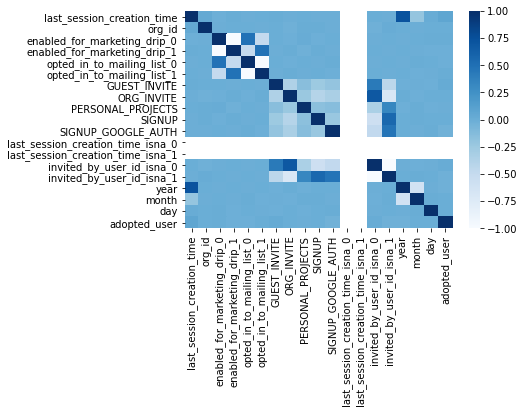

In [32]:
sns.heatmap(training_data.corr(), cmap='Blues')
plt.show()

In [33]:
training_data.corr()['adopted_user']

last_session_creation_time           0.071315
org_id                               0.005940
enabled_for_marketing_drip_0         0.012998
enabled_for_marketing_drip_1        -0.012998
opted_in_to_mailing_list_0          -0.012670
opted_in_to_mailing_list_1           0.012670
GUEST_INVITE                         0.026772
ORG_INVITE                           0.000391
PERSONAL_PROJECTS                   -0.005948
SIGNUP                               0.000762
SIGNUP_GOOGLE_AUTH                  -0.025052
last_session_creation_time_isna_0         NaN
last_session_creation_time_isna_1         NaN
invited_by_user_id_isna_0            0.021018
invited_by_user_id_isna_1           -0.021018
year                                -0.017789
month                                0.000915
day                                  0.006056
adopted_user                         1.000000
Name: adopted_user, dtype: float64

Features like last_session_creation_time and GUEST_INVITE are one of the most correlated features.
It would mean that the time they last signed in would determine whether they'd come back and there are more guests on the product who are coming back to use the product.